<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/ISBN978-4-7981-6720-6/list4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 簡単なディープラーニング

* 4.2 シンプルなディープラーニングの実装
* 4.3 様々なニューラルネットワーク



### リスト 4.1 Irisデータセットを読み込む

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.data.shape)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### リスト 4.2 データを前処理する

In [2]:
from sklearn import preprocessing
from keras.utils import np_utils

# ---- 入力データ ----
scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

# ---- 正解データ ----
t = np_utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### リスト 4.3 データを訓練用データとテスト用データに分割する

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

### リスト 4.4 Kerasでモデルを構築する

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
None


### リスト 4.5 モデルを訓練する

In [5]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.2033 - accuracy: 0.2054
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0241 - accuracy: 0.4196
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8955 - accuracy: 0.5982
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8005 - accuracy: 0.6786
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7290 - accuracy: 0.7143
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.7500
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7500
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7857
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.8036
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.8125
Epoch 11/30
14/14 [

### リスト 4.6 モデルの学習の推移を表示する

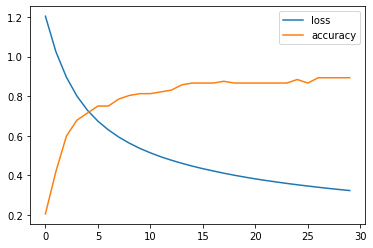

In [6]:
import matplotlib.pyplot as plt
hist_loss = history.history['loss']
hist_acc = history.history['accuracy']
plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

### リスト 4.7 モデルの評価をする

In [7]:
loss, accuracy = model.evaluate(x_test, t_test)
print("誤差:", loss, "精度:", accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 0.3580 - accuracy: 0.9211
誤差: 0.3580205738544464 精度: 0.9210526347160339


### リスト 4.8 学習済みのモデルで予測をする

In [8]:
y_test = model.predict(x_test)
print(y_test[:10])

[[0.11030813 0.5821815  0.3075104 ]
 [0.9715882  0.01284349 0.01556821]
 [0.08510604 0.3980355  0.5168584 ]
 [0.03668529 0.20038317 0.7629316 ]
 [0.10139851 0.6761351  0.22246635]
 [0.9535713  0.02135593 0.02507274]
 [0.17146146 0.57522404 0.25331455]
 [0.06647123 0.47753945 0.4559893 ]
 [0.16445607 0.50809926 0.3274447 ]
 [0.01204246 0.19580339 0.79215413]]


### リスト 4.9 モデルの保存と読み込み

In [9]:
from tensorflow.keras.models import load_model

model.save('model.h5')
load_model('model.h5')